###  Задание 1

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [52]:
data = boston.data

In [53]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
X = pd.DataFrame(data, columns=feature_names)

In [9]:
target = boston.target

In [10]:
y = pd.DataFrame(target, columns=['Price'])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaler = scaler.fit_transform(X_train)

In [18]:
X_test_scaler = scaler.transform(X_test)

In [19]:
X_train_scaler = pd.DataFrame(X_train_scaler, columns=feature_names)

In [20]:
X_test_scaler = pd.DataFrame(X_test_scaler, columns=feature_names)

In [21]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [24]:
X_train_tsne = tsne.fit_transform(X_train_scaler)

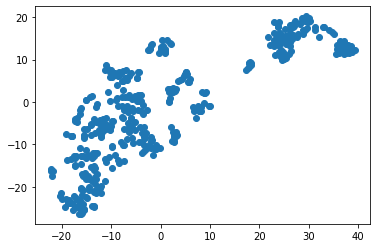

In [27]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

In [29]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [34]:
lables_train = kmeans.fit_predict(X_train_scaler)

In [35]:
pd.value_counts(lables_train)

2    191
1    127
0     86
dtype: int64

In [36]:
lables_test = kmeans.predict(X_test_scaler)

Text(25, 0, 'Кластер 2')

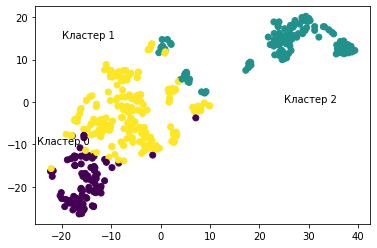

In [49]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=lables_train)
plt.text(-25, -10, 'Кластер 0')
plt.text(-20, 15, 'Кластер 1')
plt.text(25, 0, 'Кластер 2')

In [57]:
y_train.loc[lables_train==0, 'Price'].mean()

27.788372093023252

In [41]:
y_train.loc[lables_train==1, 'Price'].mean()

16.165354330708666

In [42]:
y_train.loc[lables_train==2, 'Price'].mean()

24.958115183246072

In [55]:
X_train.loc[lables_train==0, 'CRIM'].mean()

0.07356558139534886

In [58]:
X_train.loc[lables_train==1, 'CRIM'].mean()

10.797028425196853

In [59]:
X_train.loc[lables_train==2, 'CRIM'].mean()

0.42166020942408367

### Задание 3

In [61]:
X_test_tsne = tsne.fit_transform(X_test_scaler)

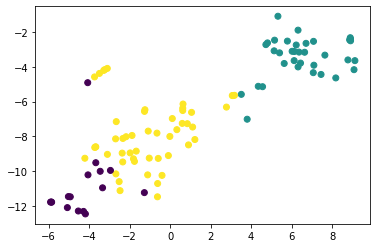

In [72]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=lables_test)

In [64]:
y_test.loc[lables_test==0, 'Price'].mean()

31.35

In [65]:
y_test.loc[lables_test==1, 'Price'].mean()

16.437142857142856

In [66]:
y_test.loc[lables_test==2, 'Price'].mean()

21.860784313725492

In [67]:
X_test.loc[lables_test==0, 'CRIM'].mean()

0.062060000000000004

In [68]:
X_test.loc[lables_test==1, 'CRIM'].mean()

10.165531142857143

In [69]:
X_test.loc[lables_test==2, 'CRIM'].mean()

0.26607882352941176